In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [7]:
name_list=['a1','a2','a3','a4','a5','a6',
          'b1','b2','b3','b4','b5','b6',
           'c1','c2','c3','c4','c5','c6',
           'd1','d2','d3','d4','d5','d6',
           'e1','e2','e3','e4','e5','e6',
           'f1','f2','f3','f4','f5','f6',
           'g1','g2','g3','g4','g5','g6','Class']
train=pd.read_csv("/Users/bruce/Downloads/connect-4.data",names=name_list)

In [8]:
train.head(5)

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,Class
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in train.columns:
    train[i]=le.fit_transform(train[i].values)

In [10]:
train.head(5)

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,Class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [11]:
features=train.drop("Class",axis=1)
outcomes=train["Class"].values
features.head(5)

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, outcomes, test_size=0.25, random_state=10)

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [13]:
model=RandomForestClassifier(n_estimators=5)
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
results=["Ranom Forest",cv_result.mean(),cv_result.std()]

print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[0] , results[1] * 100, results[2] * 100))



Ranom Forest         75.72 (+/-) 0.75 


In [14]:
final_model = RandomForestClassifier(n_estimators=100,max_features='auto',bootstrap=True,oob_score=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[    0     0  1550]
 [    0    20  4172]
 [    0     0 11148]]
66.1219656602
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1550
          1       1.00      0.00      0.01      4192
          2       0.66      1.00      0.80     11148

avg / total       0.68      0.66      0.53     16890



/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
final_model = RandomForestClassifier(n_estimators=1,max_features=None,bootstrap=False,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[    0   155  1395]
 [    0   912  3280]
 [    0   601 10547]]
67.8448786264
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1550
          1       0.55      0.22      0.31      4192
          2       0.69      0.95      0.80     11148

avg / total       0.59      0.68      0.61     16890



# random forest

In [26]:
final_model = XGBClassifier(n_estimators=500,num_boost_round=1,max_depth=6,subsample=0.632,colsample_bytree=0.4)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)



[[  278   422   850]
 [  135  3262   795]
 [   84   480 10584]]
83.6234458259
             precision    recall  f1-score   support

          0       0.56      0.18      0.27      1550
          1       0.78      0.78      0.78      4192
          2       0.87      0.95      0.91     11148

avg / total       0.82      0.84      0.82     16890



# Decision tree

In [23]:
final_model = XGBClassifier(n_estimators=1,num_boost_round=1,max_depth=6,subsample=1,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[    1   212  1337]
 [    3  1346  2843]
 [    0   716 10432]]
69.739490823
             precision    recall  f1-score   support

          0       0.25      0.00      0.00      1550
          1       0.59      0.32      0.42      4192
          2       0.71      0.94      0.81     11148

avg / total       0.64      0.70      0.64     16890



In [27]:
final_model = XGBClassifier(n_estimators=500,num_boost_round=1,max_depth=6,subsample=0.632,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[  348   438   764]
 [  172  3353   667]
 [  126   433 10589]]
84.6062759029
             precision    recall  f1-score   support

          0       0.54      0.22      0.32      1550
          1       0.79      0.80      0.80      4192
          2       0.88      0.95      0.91     11148

avg / total       0.83      0.85      0.83     16890



In [4]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint, History
from keras.layers import Dense, Activation, Dropout, Input
from keras import optimizers
history=History()

# standard feed-forward neural network

In [39]:
m = Sequential()
m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(len(np.unique(Y_train)), activation='softmax'))
    
m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
hist=m.fit(
    # Feature matrix
    X_train.values, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=125),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=32, 
)

Train on 45600 samples, validate on 5067 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.85618, saving model to best.model
1s - loss: 0.8987 - acc: 0.6409 - val_loss: 0.8562 - val_acc: 0.6493
Epoch 2/200
Epoch 00001: val_loss did not improve
1s - loss: 0.8562 - acc: 0.6587 - val_loss: 0.8568 - val_acc: 0.6493
Epoch 3/200
Epoch 00002: val_loss improved from 0.85618 to 0.85362, saving model to best.model
1s - loss: 0.8511 - acc: 0.6587 - val_loss: 0.8536 - val_acc: 0.6493
Epoch 4/200
Epoch 00003: val_loss improved from 0.85362 to 0.84547, saving model to best.model
1s - loss: 0.8443 - acc: 0.6587 - val_loss: 0.8455 - val_acc: 0.6493
Epoch 5/200
Epoch 00004: val_loss improved from 0.84547 to 0.84110, saving model to best.model
1s - loss: 0.8371 - acc: 0.6587 - val_loss: 0.8411 - val_acc: 0.6493
Epoch 6/200
Epoch 00005: val_loss improved from 0.84110 to 0.83885, saving model to best.model
1s - loss: 0.8344 - acc: 0.6586 - val_loss: 0.8389 - val_acc: 0.6493
Epoch 7/200
Epoc

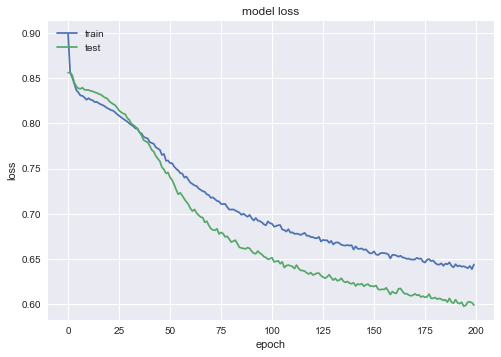

In [41]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
m.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in m.predict(X_test.values).argmax(axis=1)]
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[    1   410  1139]
 [    1  2341  1850]
 [    0   570 10578]]
76.4949674364
             precision    recall  f1-score   support

          0       0.50      0.00      0.00      1550
          1       0.70      0.56      0.62      4192
          2       0.78      0.95      0.86     11148

avg / total       0.74      0.76      0.72     16890



# New MODEL

In [13]:
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.models import Model
import keras
history = History()


input_1 = Input(shape=(1,))
input_2 = Input(shape=(1,))
input_3 = Input(shape=(1,))
input_4 = Input(shape=(1,))
input_5 = Input(shape=(1,))
input_6 = Input(shape=(1,))
input_7 = Input(shape=(1,))
input_8 = Input(shape=(1,))
input_9 = Input(shape=(1,))
input_10 = Input(shape=(1,))
input_11= Input(shape=(1,))
input_12= Input(shape=(1,))
input_13= Input(shape=(1,))
input_14= Input(shape=(1,))
input_15= Input(shape=(1,))
input_16= Input(shape=(1,))

input_17= Input(shape=(1,))
input_18= Input(shape=(1,))
input_19= Input(shape=(1,))
input_20= Input(shape=(1,))
input_21= Input(shape=(1,))
input_22 = Input(shape=(1,))
input_23= Input(shape=(1,))
input_24= Input(shape=(1,))

input_25= Input(shape=(1,))
input_26= Input(shape=(1,))
input_27= Input(shape=(1,))
input_28= Input(shape=(1,))
input_29= Input(shape=(1,))
input_30= Input(shape=(1,))
input_31= Input(shape=(1,))
input_32= Input(shape=(1,))

input_33= Input(shape=(1,))
input_34= Input(shape=(1,))
input_35= Input(shape=(1,))
input_36= Input(shape=(1,))
input_37= Input(shape=(1,))
input_38= Input(shape=(1,))
input_39 = Input(shape=(1,))
input_40= Input(shape=(1,))

input_41 = Input(shape=(1,))
input_42 = Input(shape=(1,))








hidden_1 = Dense(32, activation='sigmoid')(input_1)
hidden_2 = Dense(32, activation='sigmoid')(input_2)
hidden_3 = Dense(32, activation='sigmoid')(input_3)
hidden_4 = Dense(32, activation='sigmoid')(input_4)
hidden_5 = Dense(32, activation='sigmoid')(input_5)
hidden_6 = Dense(32, activation='sigmoid')(input_6)
hidden_7 = Dense(32, activation='sigmoid')(input_7)
hidden_8 = Dense(32, activation='sigmoid')(input_8)
hidden_9 = Dense(32, activation='sigmoid')(input_9)
hidden_10 = Dense(32, activation='sigmoid')(input_10)
hidden_11= Dense(32, activation='sigmoid')(input_11)
hidden_12 = Dense(32, activation='sigmoid')(input_12)
hidden_13 = Dense(32, activation='sigmoid')(input_13)
hidden_14 = Dense(32, activation='sigmoid')(input_14)
hidden_15 = Dense(32, activation='sigmoid')(input_15)
hidden_16 = Dense(32, activation='sigmoid')(input_16)
hidden_17 = Dense(32, activation='sigmoid')(input_17)
hidden_18 = Dense(32, activation='sigmoid')(input_18)
hidden_19 = Dense(32, activation='sigmoid')(input_19)
hidden_20 = Dense(32, activation='sigmoid')(input_20)

hidden_21 = Dense(32, activation='sigmoid')(input_21)
hidden_22 = Dense(32, activation='sigmoid')(input_22)
hidden_23 = Dense(32, activation='sigmoid')(input_23)
hidden_24 = Dense(32, activation='sigmoid')(input_24)
hidden_25 = Dense(32, activation='sigmoid')(input_25)
hidden_26 = Dense(32, activation='sigmoid')(input_26)
hidden_27 = Dense(32, activation='sigmoid')(input_27)
hidden_28 = Dense(32, activation='sigmoid')(input_28)
hidden_29 = Dense(32, activation='sigmoid')(input_29)
hidden_30 = Dense(32, activation='sigmoid')(input_30)
hidden_31 = Dense(32, activation='sigmoid')(input_31)
hidden_32 = Dense(32, activation='sigmoid')(input_32)
hidden_33 = Dense(32, activation='sigmoid')(input_33)
hidden_34 = Dense(32, activation='sigmoid')(input_34)
hidden_35 = Dense(32, activation='sigmoid')(input_35)
hidden_36 = Dense(32, activation='sigmoid')(input_36)
hidden_37 = Dense(32, activation='sigmoid')(input_37)
hidden_38 = Dense(32, activation='sigmoid')(input_38)
hidden_39 = Dense(32, activation='sigmoid')(input_39)
hidden_40 = Dense(32, activation='sigmoid')(input_40)
hidden_41 = Dense(32, activation='sigmoid')(input_41)
hidden_42 = Dense(32, activation='sigmoid')(input_42)






value_list=[X_train[['a1']].values,
            X_train[['a2']].values,
            X_train[['a3']].values,
            X_train[['a4']].values,
            X_train[['a5']].values,
            X_train[['a6']].values,
            X_train[['b1']].values,
            X_train[['b2']].values,
            X_train[['b3']].values,
            X_train[['b4']].values,
            X_train[['b5']].values,
            X_train[['b6']].values,
            X_train[['c1']].values,
            X_train[['c2']].values,
            X_train[['c3']].values,
            X_train[['c4']].values,
            X_train[['c5']].values,
            X_train[['c6']].values,
            X_train[['d1']].values,
            X_train[['d2']].values,
            X_train[['d3']].values,
            X_train[['d4']].values,
            X_train[['d5']].values,
            X_train[['d6']].values,
            X_train[['e1']].values,
            X_train[['e2']].values,
            X_train[['e3']].values,
            X_train[['e4']].values,
            X_train[['e5']].values,
            X_train[['e6']].values,
            X_train[['f1']].values,
            X_train[['f2']].values,
            X_train[['f3']].values,
            X_train[['f4']].values,
            X_train[['f5']].values,
            X_train[['f6']].values,
            X_train[['g1']].values,
            X_train[['g2']].values,
            X_train[['g3']].values,
            X_train[['g4']].values,
            X_train[['g5']].values,
            X_train[['g6']].values,
            
           ]

value_list_test=[X_test[['a1']].values,
            X_test[['a2']].values,
            X_test[['a3']].values,
            X_test[['a4']].values,
            X_test[['a5']].values,
            X_test[['a6']].values,
            X_test[['b1']].values,
            X_test[['b2']].values,
            X_test[['b3']].values,
            X_test[['b4']].values,
            X_test[['b5']].values,
            X_test[['b6']].values,
            X_test[['c1']].values,
            X_test[['c2']].values,
            X_test[['c3']].values,
            X_test[['c4']].values,
            X_test[['c5']].values,
            X_test[['c6']].values,
            X_test[['d1']].values,
            X_test[['d2']].values,
            X_test[['d3']].values,
            X_test[['d4']].values,
            X_test[['d5']].values,
            X_test[['d6']].values,
            X_test[['e1']].values,
            X_test[['e2']].values,
            X_test[['e3']].values,
            X_test[['e4']].values,
            X_test[['e5']].values,
            X_test[['e6']].values,
            X_test[['f1']].values,
            X_test[['f2']].values,
            X_test[['f3']].values,
            X_test[['f4']].values,
            X_test[['f5']].values,
            X_test[['f6']].values,
            X_test[['g1']].values,
            X_test[['g2']].values,
            X_test[['g3']].values,
            X_test[['g4']].values,
            X_test[['g5']].values,
            X_test[['g6']].values,
           ]

x = keras.layers.concatenate([hidden_1,hidden_2,hidden_3,hidden_4,hidden_5,hidden_6,hidden_7,hidden_8,
                             hidden_9,hidden_10,hidden_11,hidden_12,hidden_13,hidden_14,hidden_15,hidden_16,
                             hidden_17,hidden_18,hidden_19,hidden_20,hidden_21,hidden_22,hidden_23,hidden_24,
                             hidden_25,hidden_26,hidden_27,hidden_28,hidden_29,hidden_30,hidden_31,hidden_32,
                             hidden_33,hidden_34,hidden_35,hidden_36,hidden_37,hidden_38,hidden_39,hidden_40,
                             hidden_41,hidden_42])

x = Dense(96, activation='sigmoid')(x)
output = Dense(len(np.unique(Y_train)), activation='softmax')(x)

model = Model(inputs=[input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,
                     input_9,input_10,input_11,input_12,input_13,input_14,input_15,input_16,
                     input_17,input_18,input_19,input_20,input_21,input_22,input_23,input_24,
                     input_25,input_26,input_27,input_28,input_29,input_30,input_31,input_32,
                     input_33,input_34,input_35,input_36,input_37,input_38,input_39,input_40,
                     input_41,input_42], outputs=[output])
model.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hist=model.fit(
    # Feature matrix
    value_list, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=256, 
)

Train on 45600 samples, validate on 5067 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.85794, saving model to best.model
2s - loss: 0.8543 - acc: 0.6587 - val_loss: 0.8579 - val_acc: 0.6493
Epoch 2/200
Epoch 00001: val_loss improved from 0.85794 to 0.85725, saving model to best.model
2s - loss: 0.8426 - acc: 0.6587 - val_loss: 0.8573 - val_acc: 0.6493
Epoch 3/200
Epoch 00002: val_loss did not improve
2s - loss: 0.8371 - acc: 0.6587 - val_loss: 0.8598 - val_acc: 0.6493
Epoch 4/200
Epoch 00003: val_loss improved from 0.85725 to 0.84258, saving model to best.model
2s - loss: 0.8320 - acc: 0.6586 - val_loss: 0.8426 - val_acc: 0.6493
Epoch 5/200
Epoch 00004: val_loss did not improve
2s - loss: 0.8312 - acc: 0.6585 - val_loss: 0.8437 - val_acc: 0.6493
Epoch 6/200
Epoch 00005: val_loss did not improve
2s - loss: 0.8317 - acc: 0.6588 - val_loss: 0.8450 - val_acc: 0.6493
Epoch 7/200
Epoch 00006: val_loss did not improve
2s - loss: 0.8288 - acc: 0.6588 - val_loss: 0.8520 - val

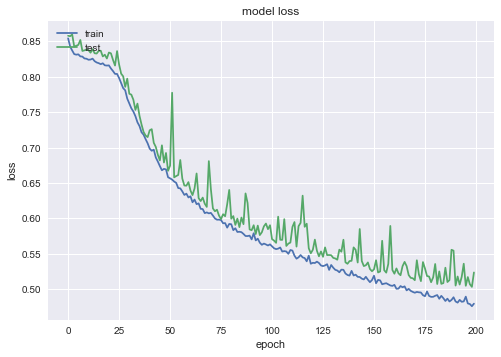

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in model.predict(value_list_test).argmax(axis=1)]

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[   86   465   999]
 [   89  3006  1097]
 [   52   609 10487]]
80.3966844287
             precision    recall  f1-score   support

          0       0.38      0.06      0.10      1550
          1       0.74      0.72      0.73      4192
          2       0.83      0.94      0.88     11148

avg / total       0.77      0.80      0.77     16890



# neural network ensemble

In [53]:
data_train,data_val=train_test_split(train,test_size=0.25, random_state=10)
X_val=data_val.drop(['Class'], axis=1).values
y_val=data_val['Class'].ravel()

In [54]:
def train_nn_simple(data_train,X_val,y_val):
    

    data_train_new=data_train.sample(frac=0.632,replace=True)
    X_train=data_train_new.drop(['Class'], axis=1).values
    y_train=data_train_new['Class'].ravel()
    
    m = Sequential()
    m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='sigmoid'))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='sigmoid'))
    m.add(Dropout(0.5))
    m.add(Dense(len(np.unique(y_train)), activation='softmax'))
    
    m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )
    
    m.fit(
    # Feature matrix
    X_train, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.2,
    batch_size=256, 
    )
    m.load_weights("best.model")
    mapping = (
    pd.get_dummies(pd.DataFrame(y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
    )
    y_pred = [mapping[pred] for pred in m.predict(X_val).argmax(axis=1)]
    return y_pred

In [55]:
result=[]
for i in range(50):
    y_pred=train_nn_simple(train,X_val,y_val)
    result.append(y_pred)

Train on 34156 samples, validate on 8540 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.83848, saving model to best.model
1s - loss: 0.9256 - acc: 0.6192 - val_loss: 0.8385 - val_acc: 0.6623
Epoch 2/200
Epoch 00001: val_loss improved from 0.83848 to 0.83654, saving model to best.model
1s - loss: 0.8620 - acc: 0.6572 - val_loss: 0.8365 - val_acc: 0.6623
Epoch 3/200
Epoch 00002: val_loss improved from 0.83654 to 0.83602, saving model to best.model
0s - loss: 0.8529 - acc: 0.6575 - val_loss: 0.8360 - val_acc: 0.6623
Epoch 4/200
Epoch 00003: val_loss did not improve
1s - loss: 0.8495 - acc: 0.6575 - val_loss: 0.8364 - val_acc: 0.6623
Epoch 5/200
Epoch 00004: val_loss improved from 0.83602 to 0.83428, saving model to best.model
1s - loss: 0.8462 - acc: 0.6575 - val_loss: 0.8343 - val_acc: 0.6623
Epoch 6/200
Epoch 00005: val_loss improved from 0.83428 to 0.82971, saving model to best.model
1s - loss: 0.8441 - acc: 0.6575 - val_loss: 0.8297 - val_acc: 0.6623
Epoch 7/200
Epoc